VALORES ATIPICOS 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#JALAR DATASET
df = pd.read_csv('NEW_YORK_SIN_NULOS.csv') 
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  float64
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  float64
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36322 non-null  object 
 6   description                                   36322 non-null  object 
 7   neighborhood_overview                         36322 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [62]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar todas las filas (ojo, si son muchísimas puede ser pesado)
pd.set_option('display.max_rows', None)

# Mostrar más ancho en pantalla
pd.set_option('display.width', None)

valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")

Valores nulos por columna:


<Figure size 1500x800 with 0 Axes>

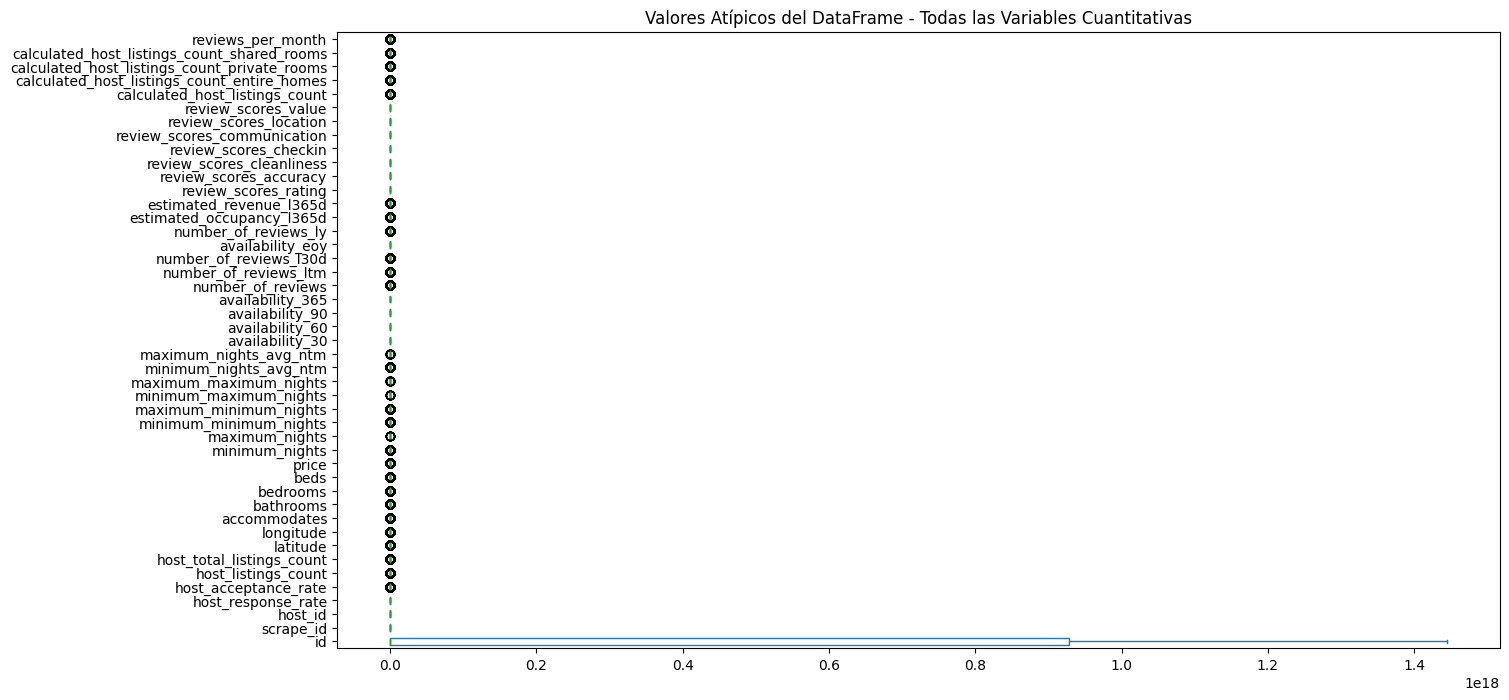

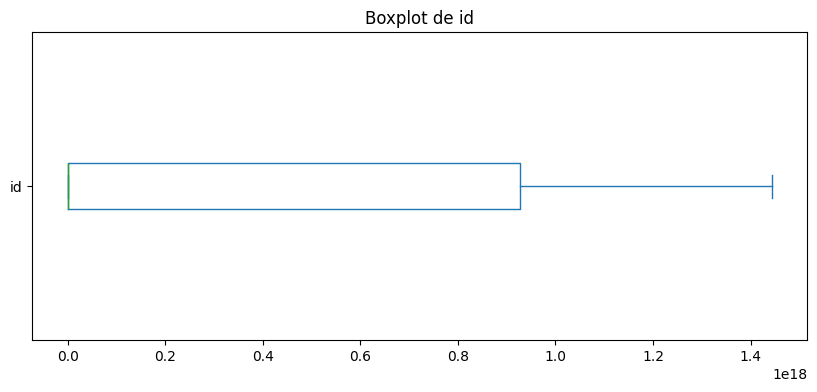

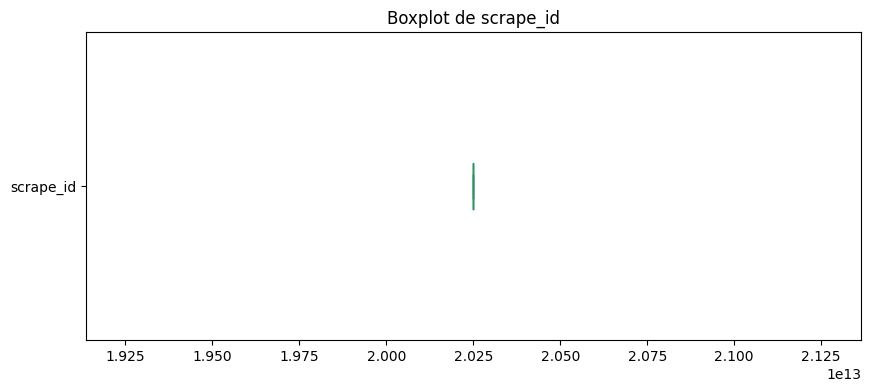

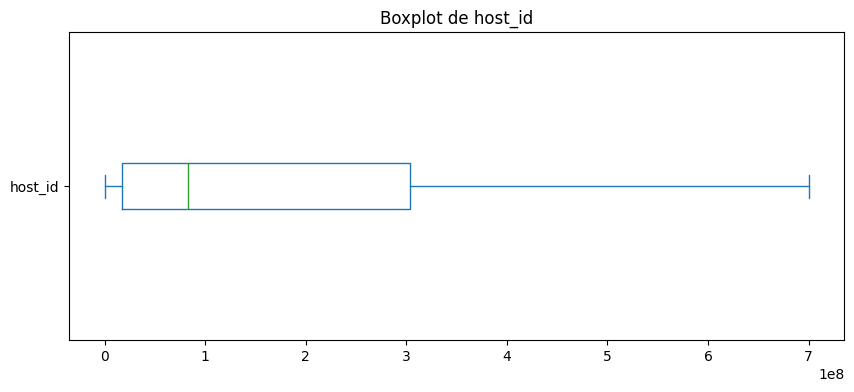

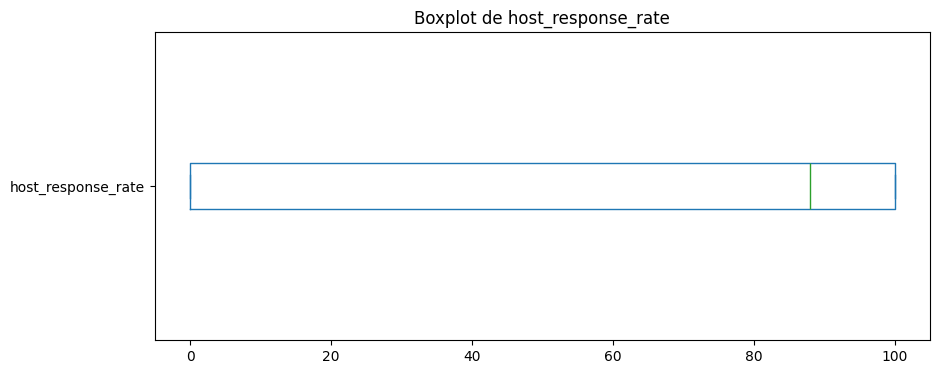

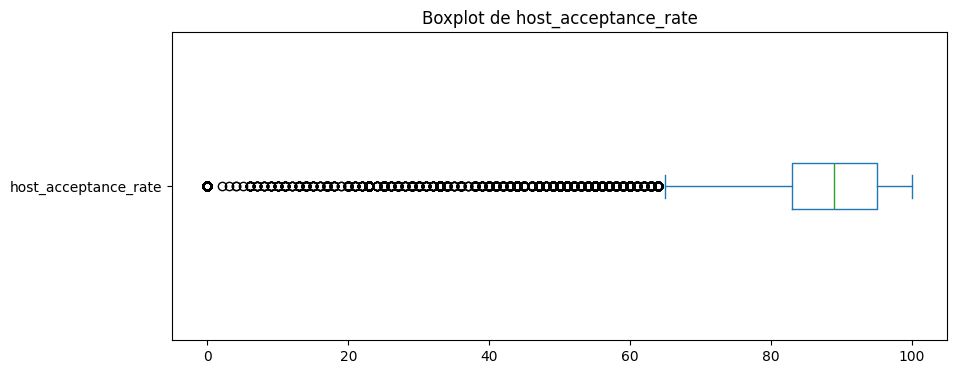

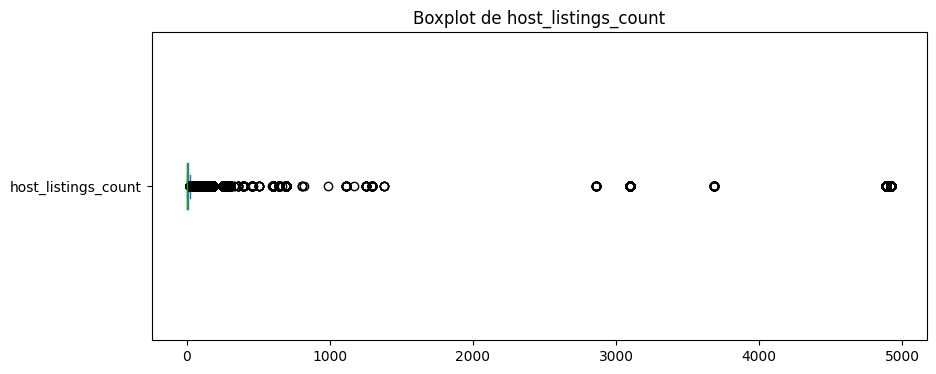

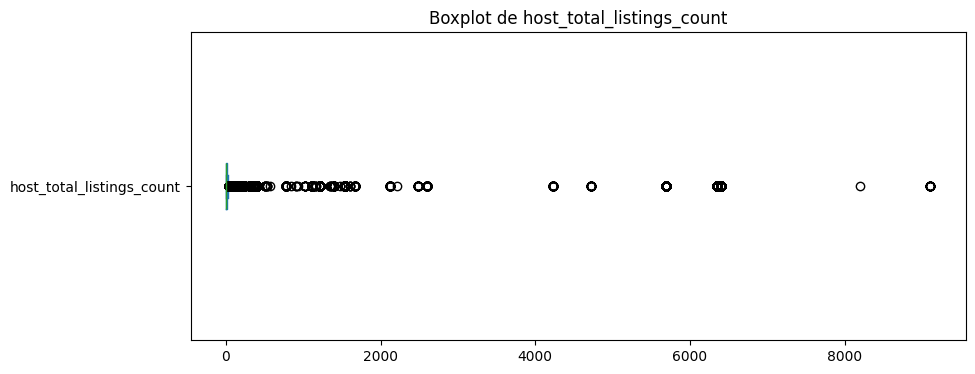

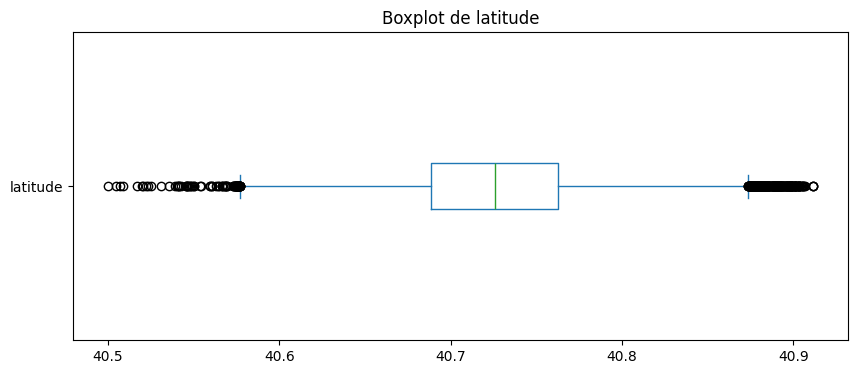

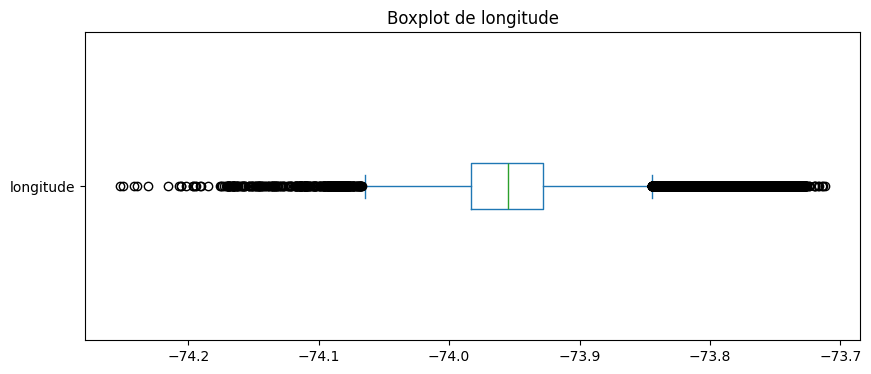

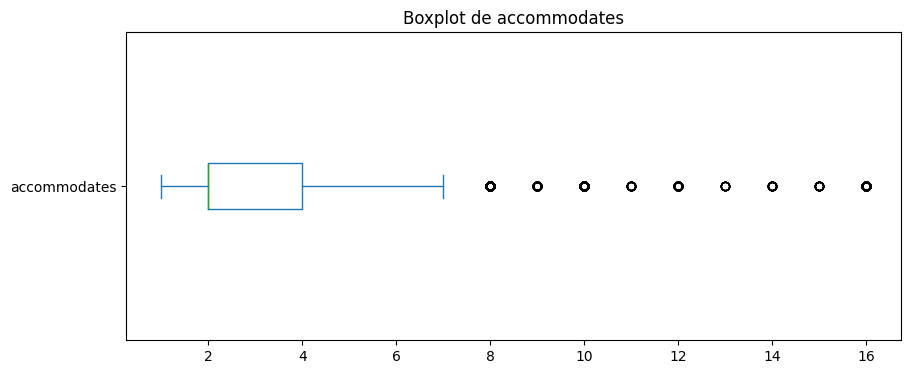

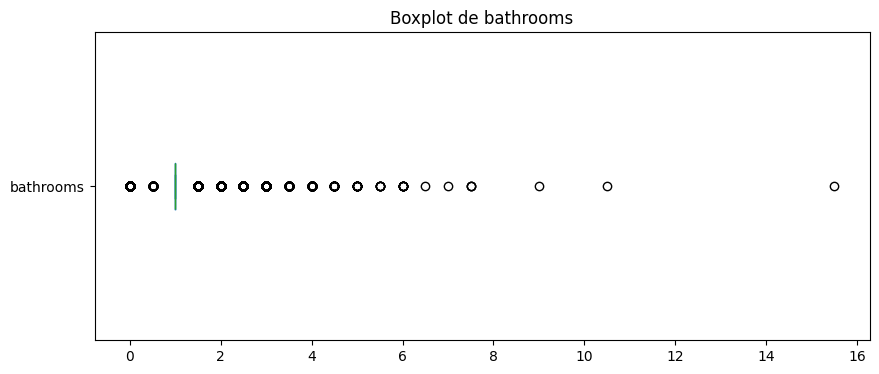

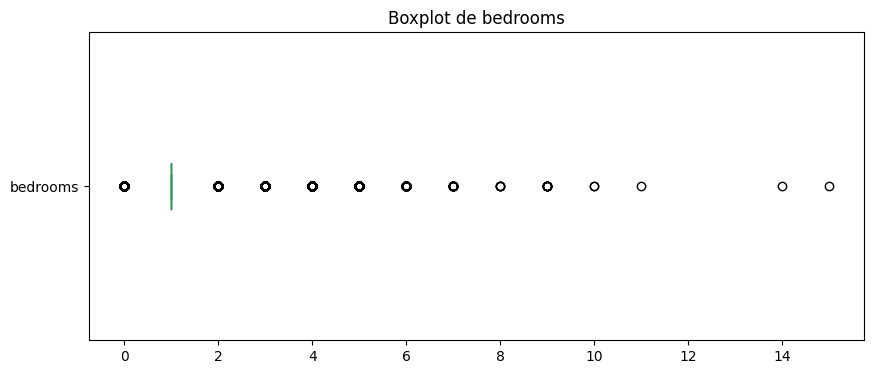

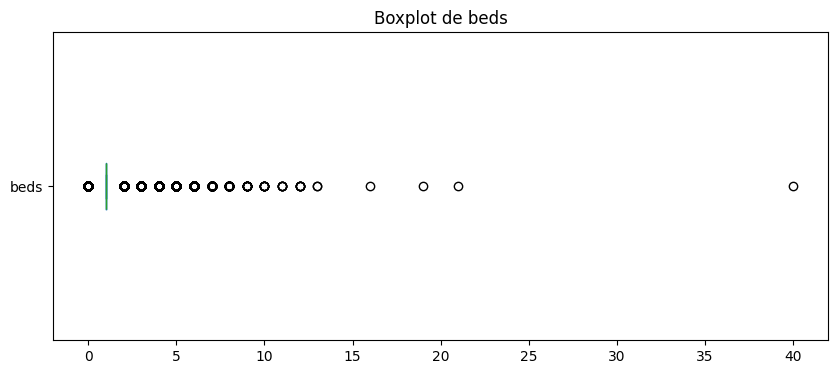

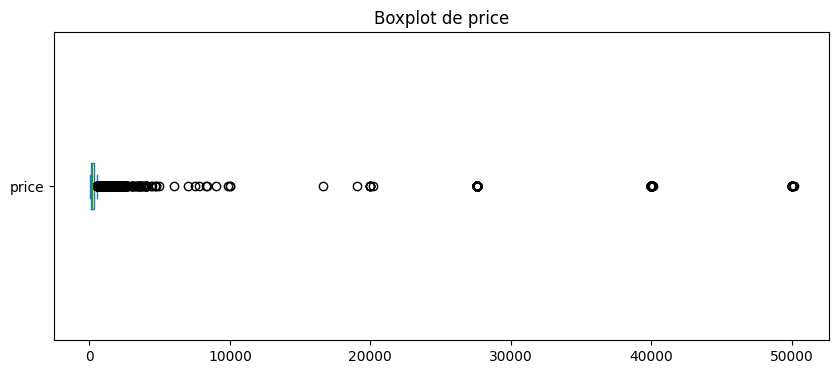

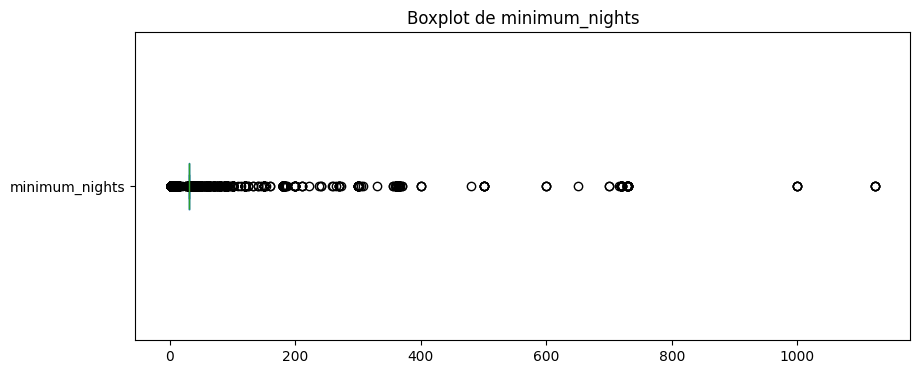

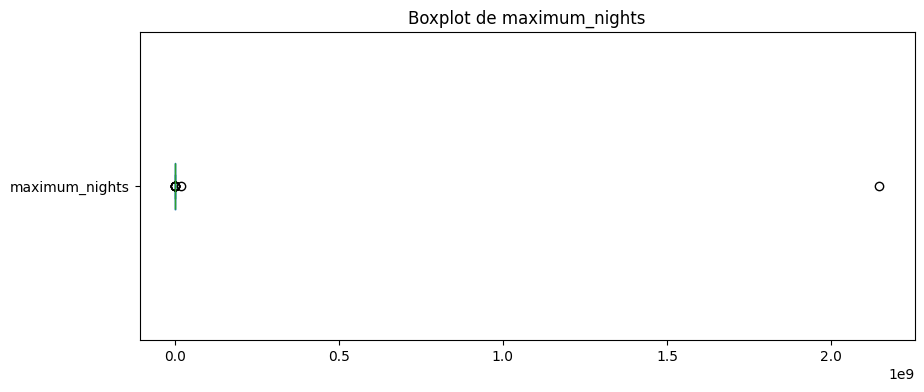

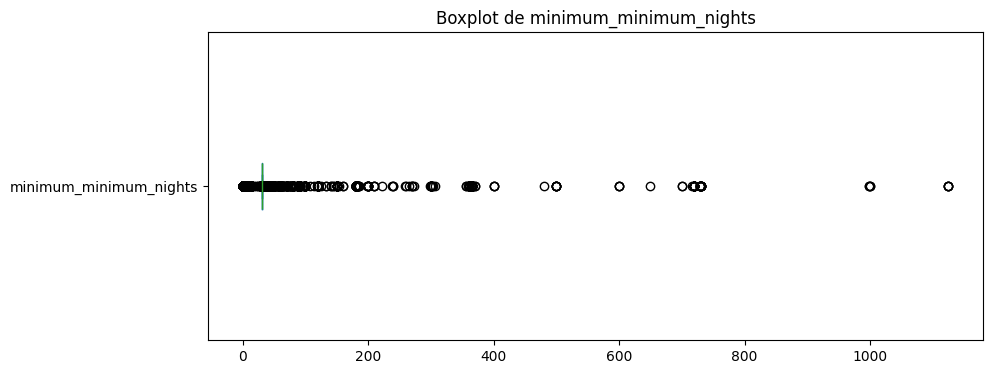

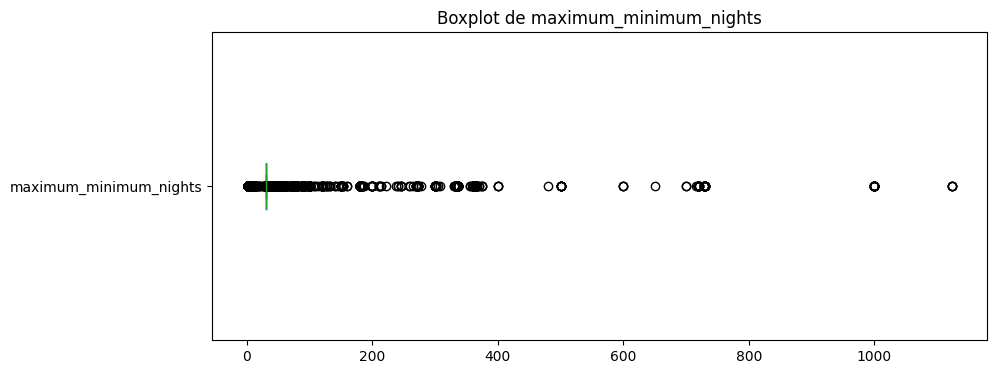

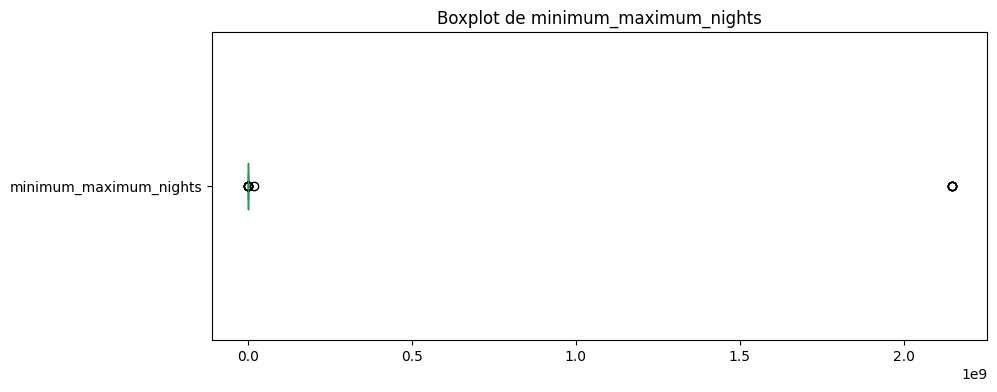

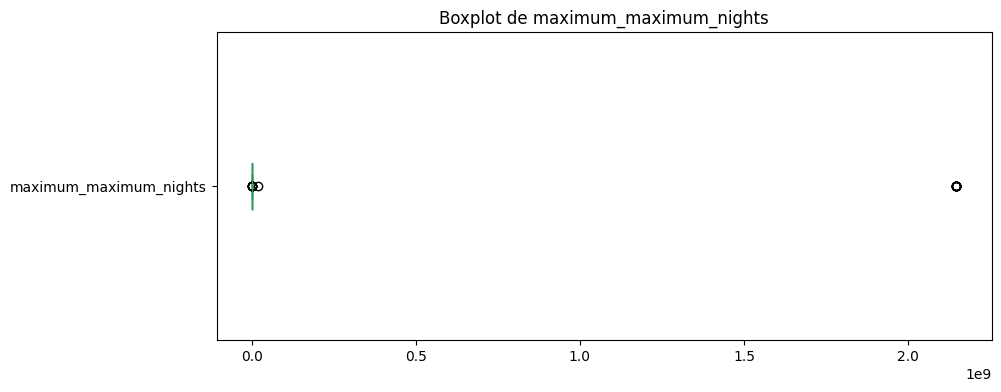

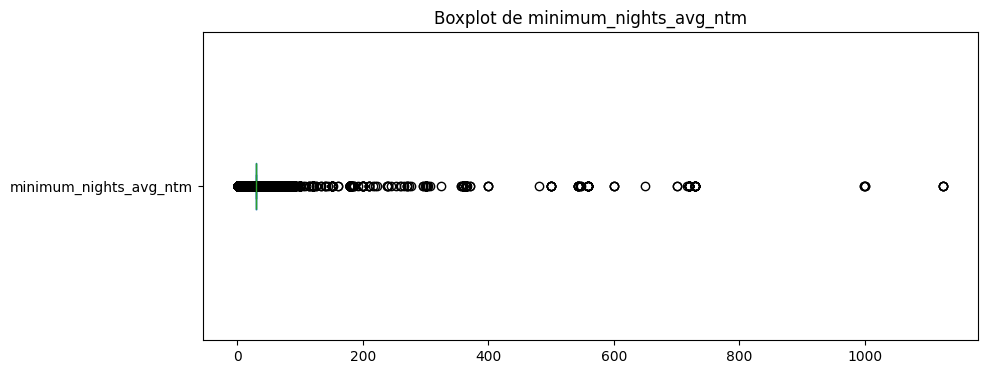

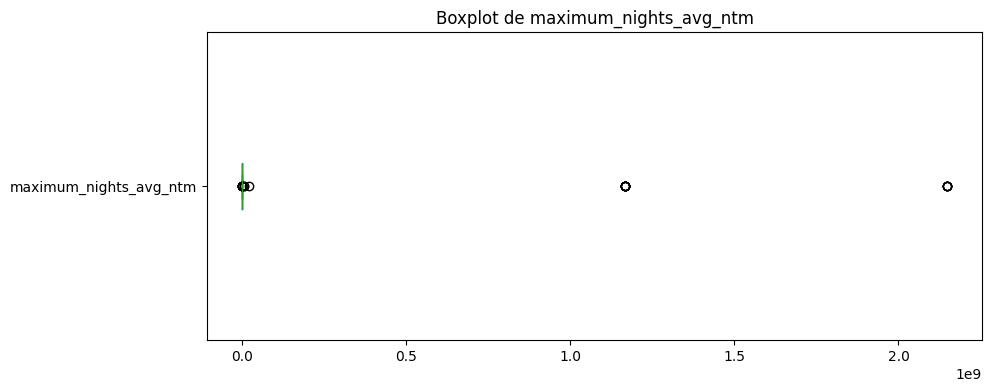

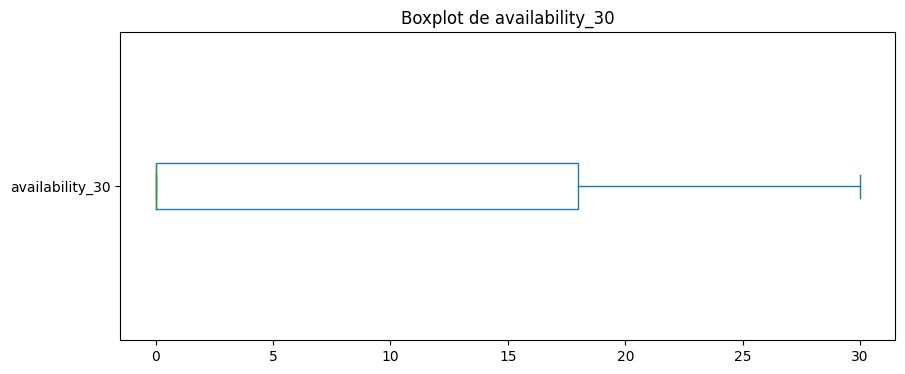

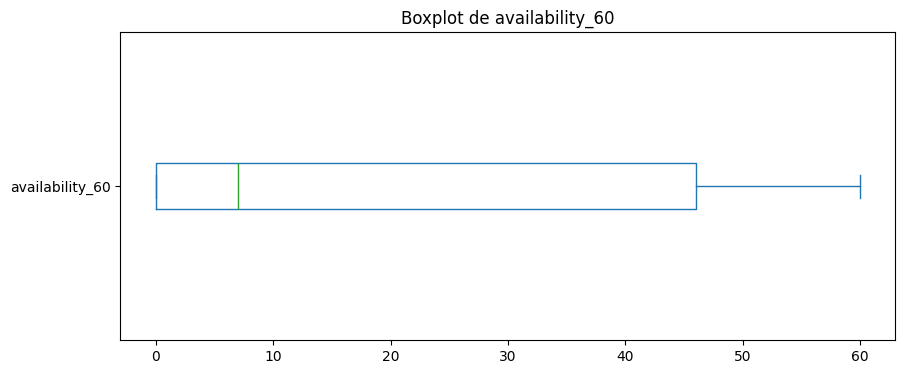

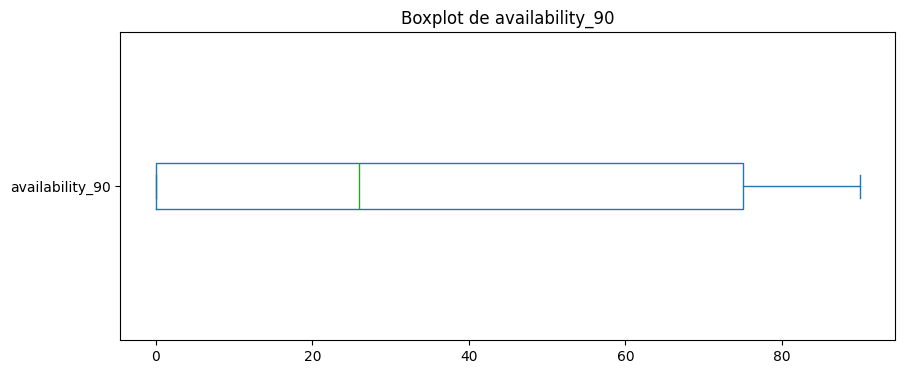

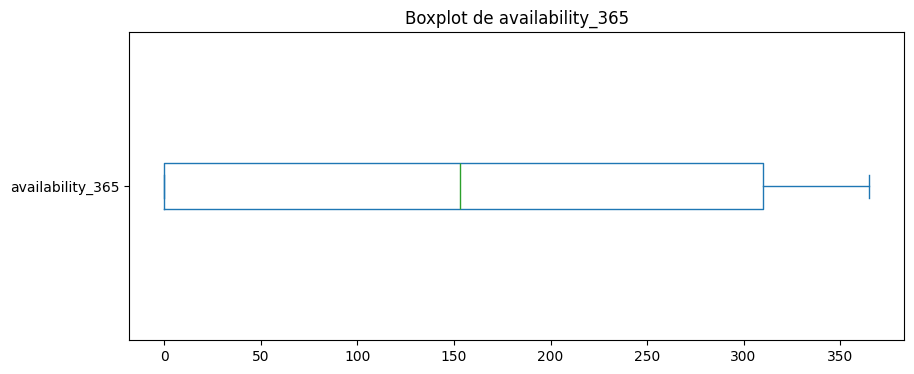

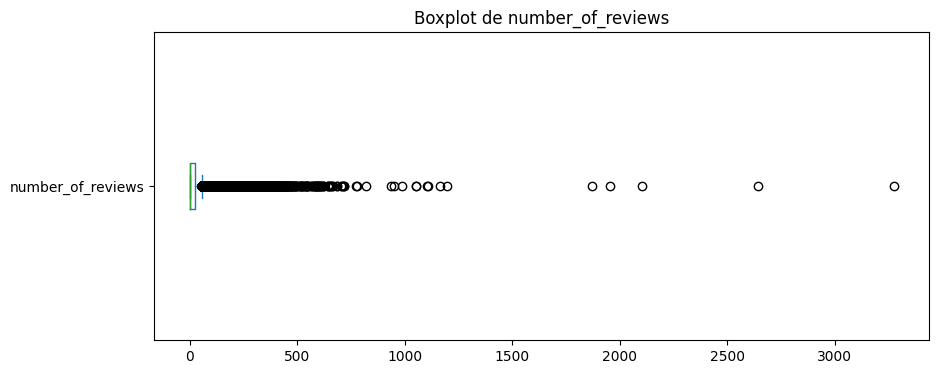

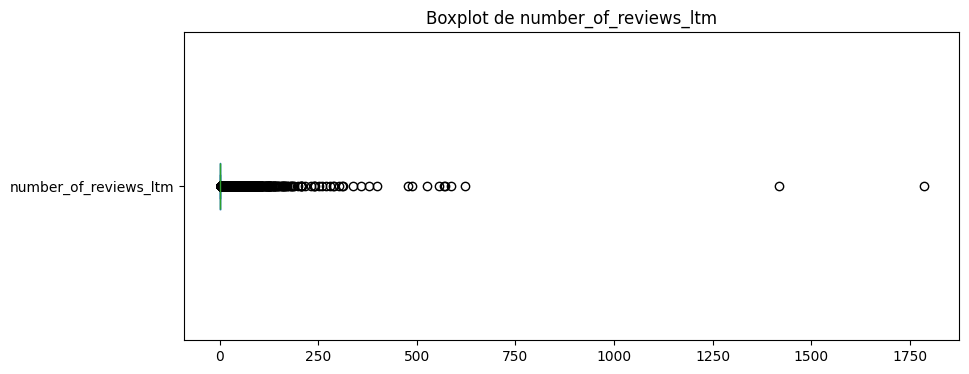

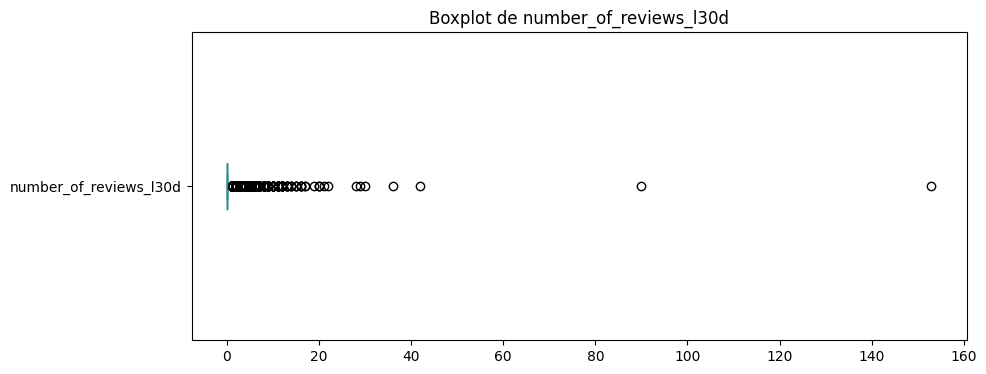

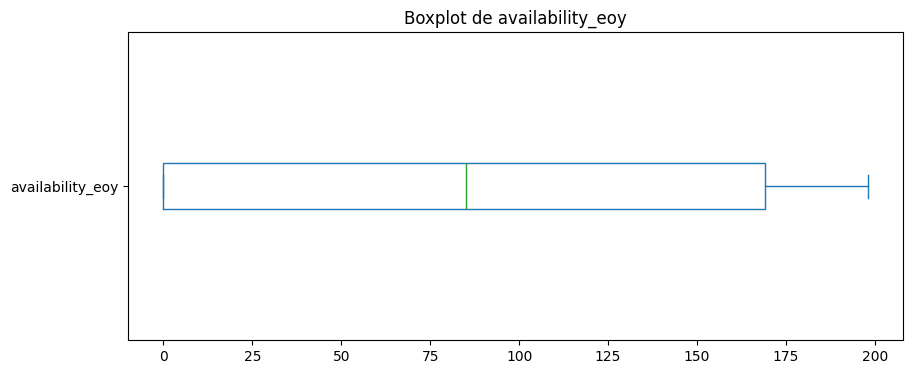

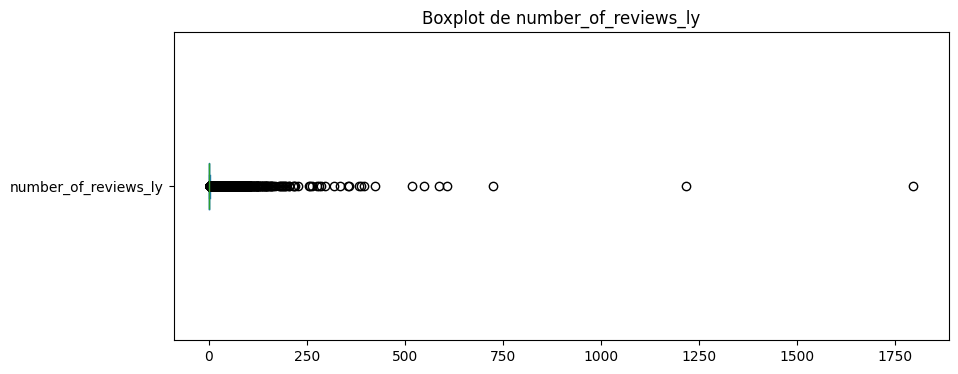

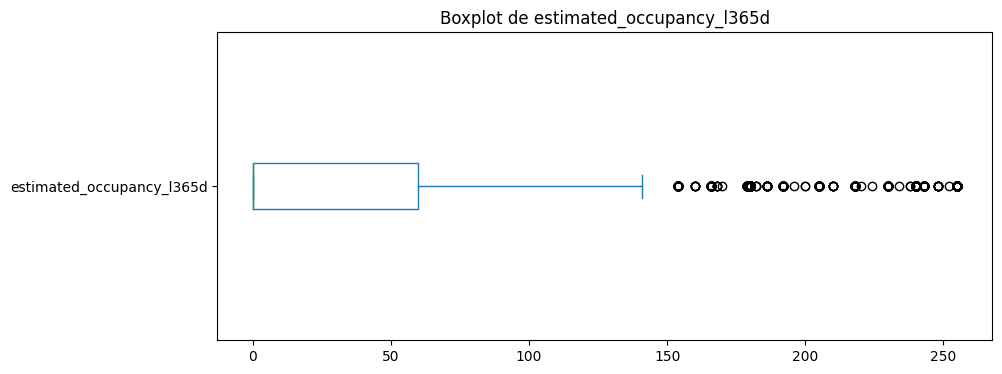

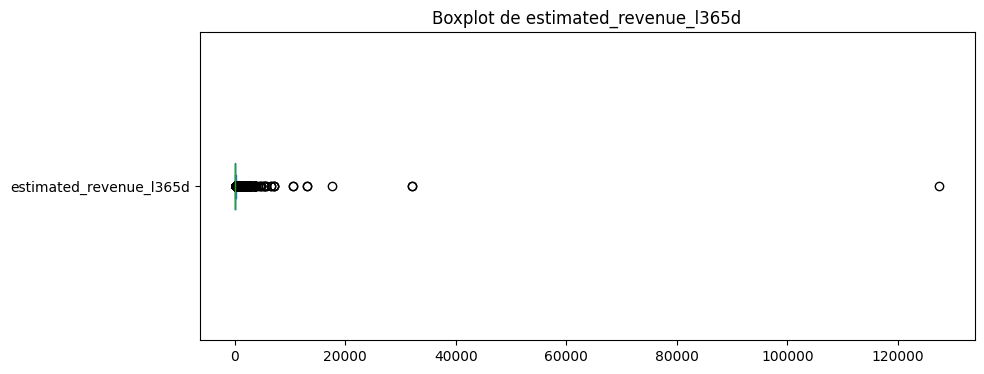

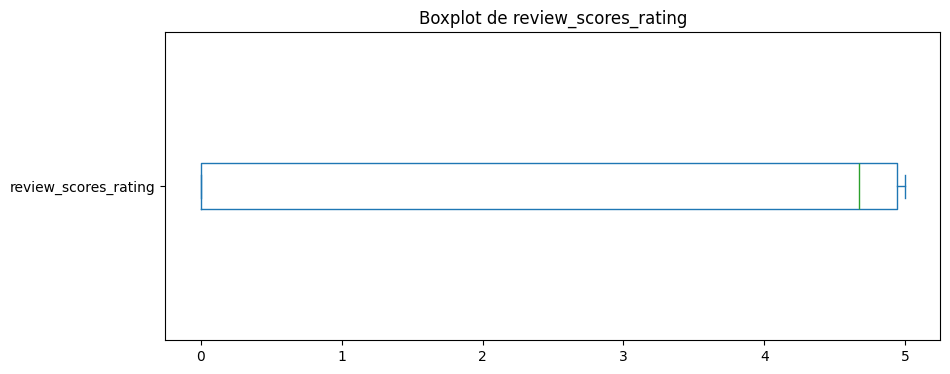

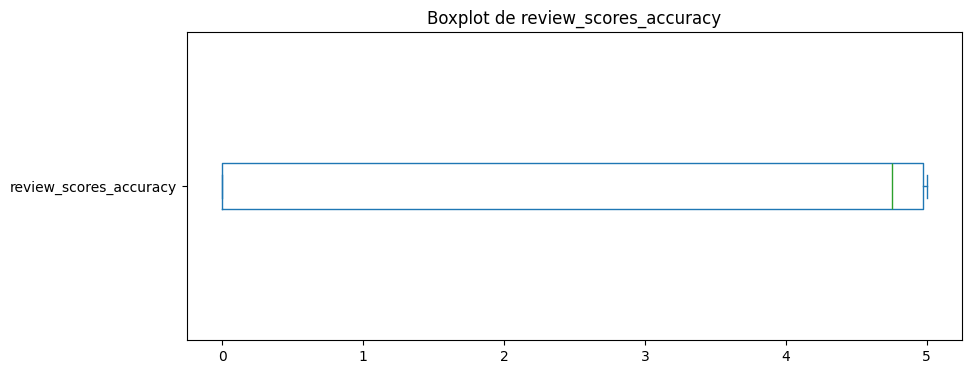

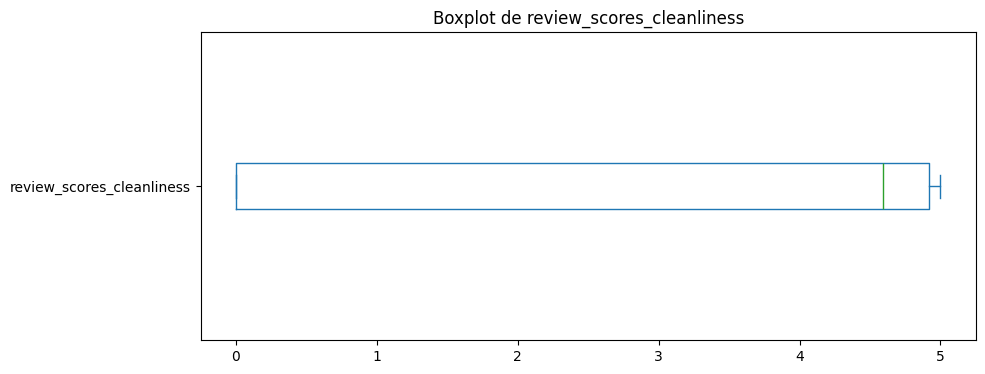

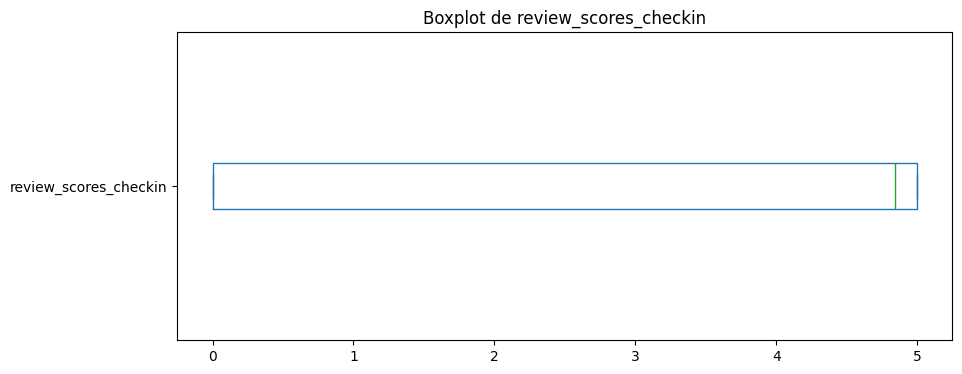

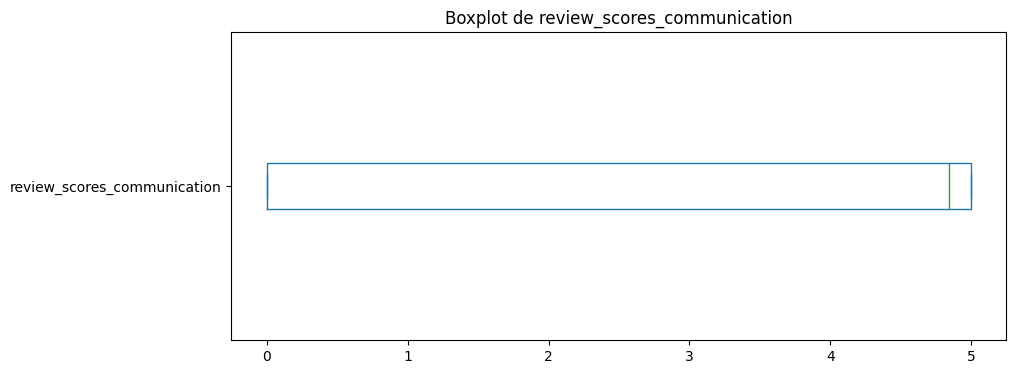

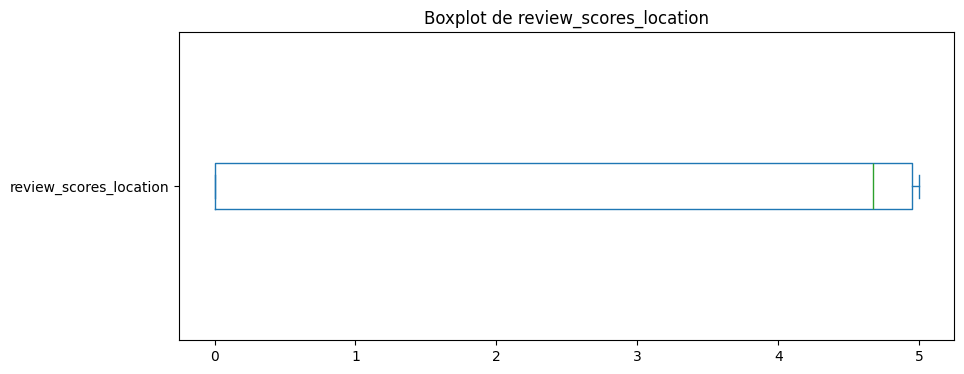

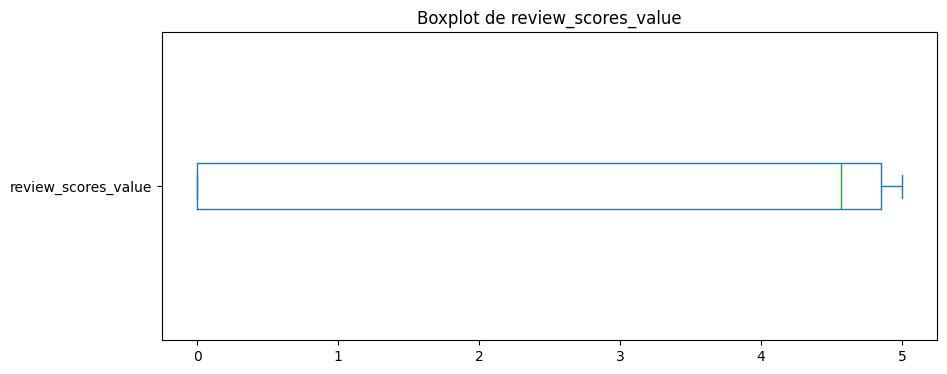

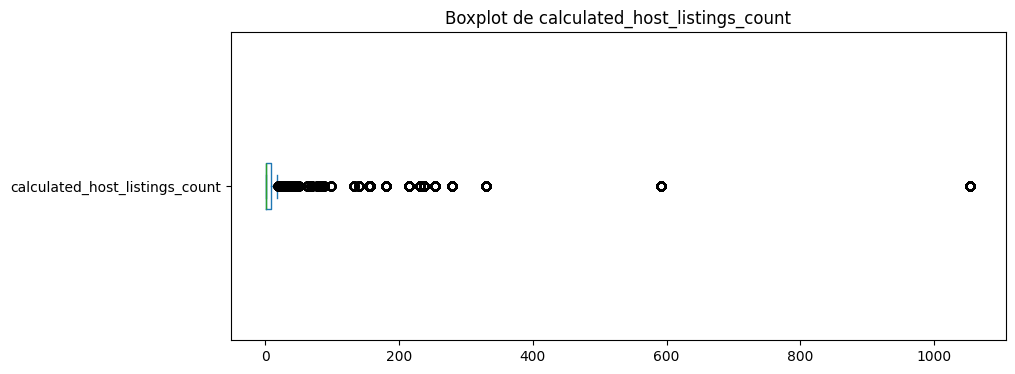

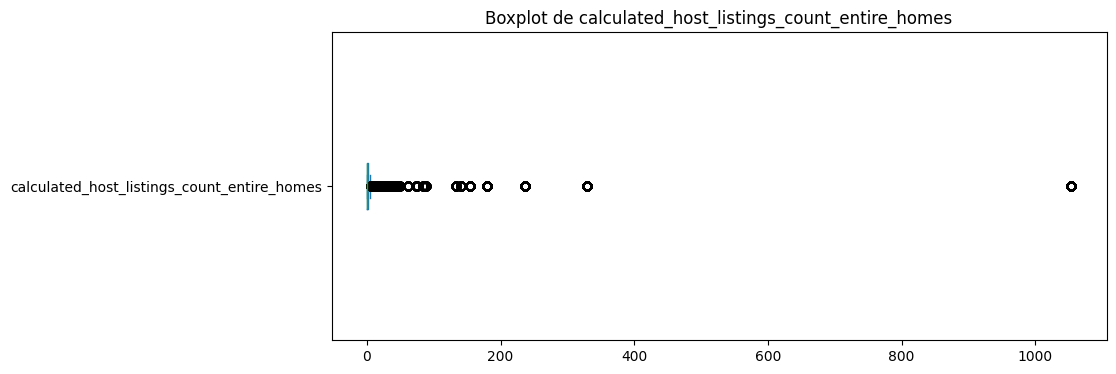

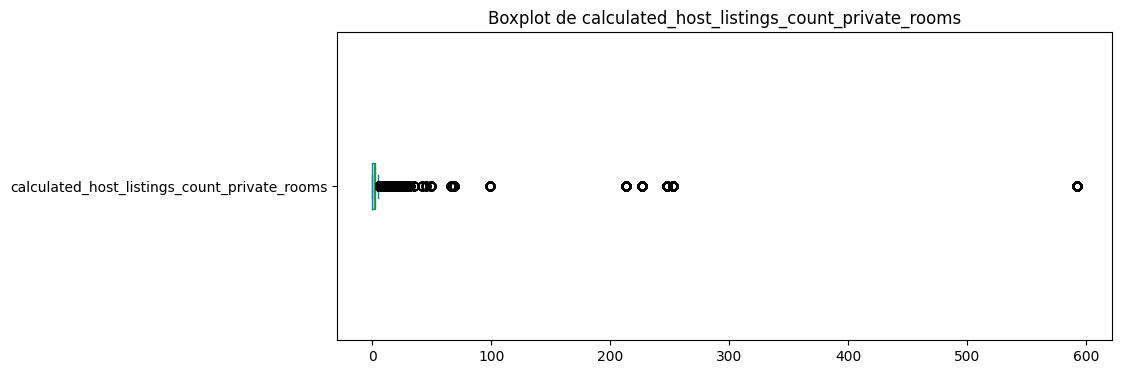

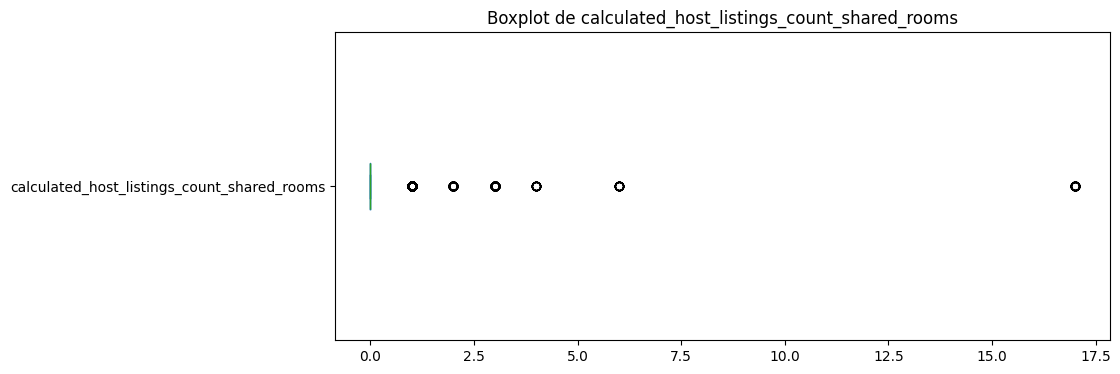

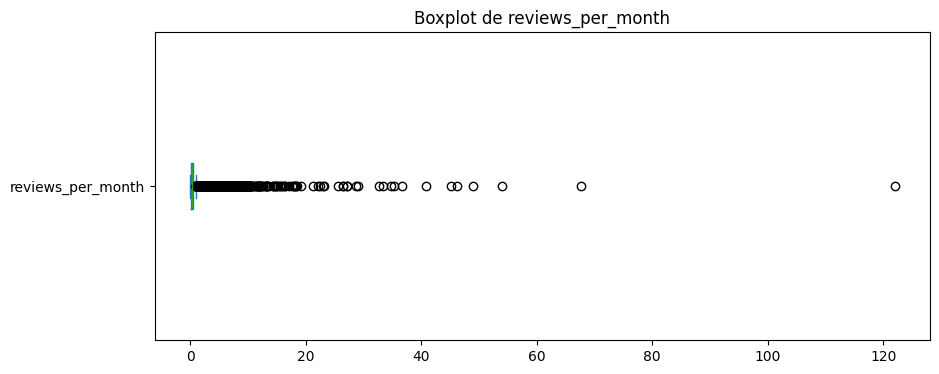

<Figure size 1500x800 with 0 Axes>

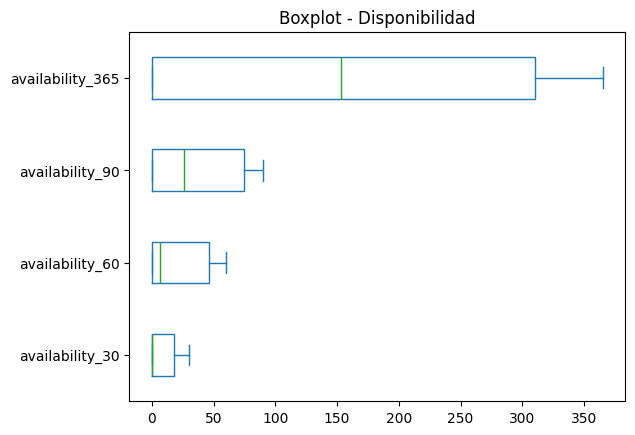

<Figure size 1500x800 with 0 Axes>

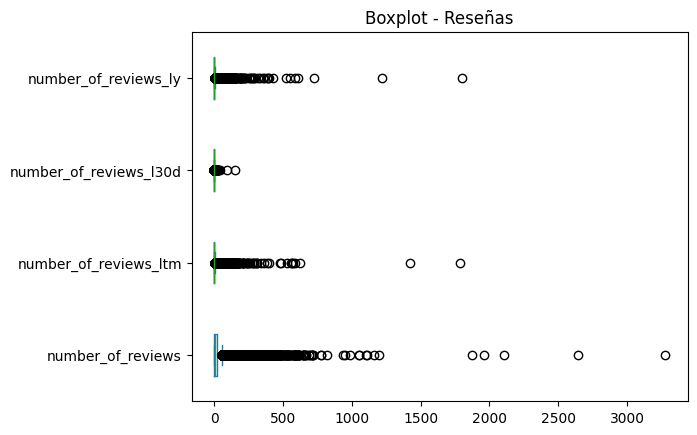

<Figure size 1500x800 with 0 Axes>

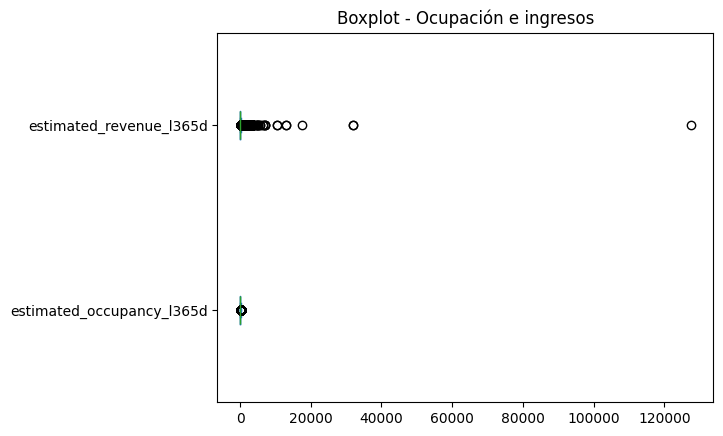

<Figure size 1500x800 with 0 Axes>

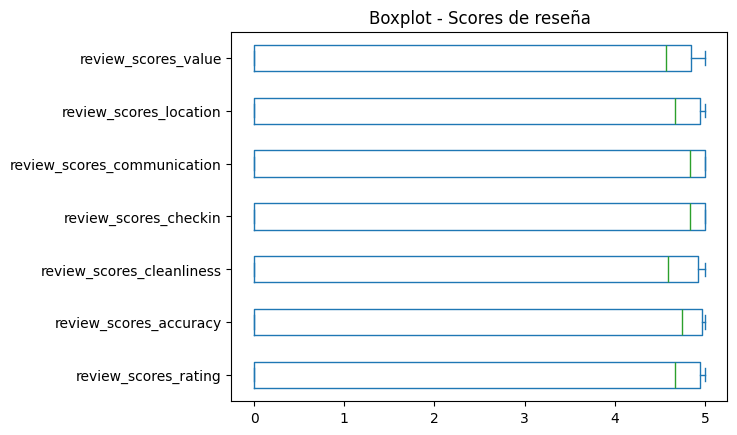

<Figure size 1500x800 with 0 Axes>

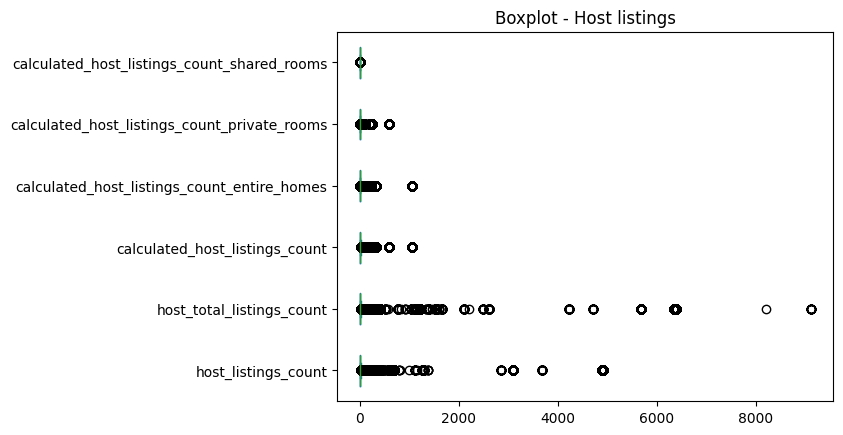

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# --- LIMPIEZA DE COLUMNAS DE PORCENTAJE ---
for pct_col in ["host_response_rate", "host_acceptance_rate"]:
    if pct_col in df.columns:
        df[pct_col] = (
            df[pct_col]
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.strip()
        )
        df[pct_col] = pd.to_numeric(df[pct_col], errors="coerce")

# --- LIMPIEZA DE "price" ---
if "price" in df.columns and not pd.api.types.is_numeric_dtype(df["price"]):
    df["price"] = (
        df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

# --- SELECCIONAR SOLO VARIABLES NUMÉRICAS ---
cuantitativas = df.select_dtypes(include=["number"]).copy()

# ===== BOXPLOT GENERAL =====
plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False, figsize=(15, 8))
plt.title("Valores Atípicos del DataFrame - Todas las Variables Cuantitativas")
plt.show()

# ===== BOXPLOTS INDIVIDUALES (para todas las columnas numéricas) =====
for col in cuantitativas.columns:
    plt.figure(figsize=(10, 4))
    cuantitativas[col].plot(kind="box", vert=False)
    plt.title(f"Boxplot de {col}")
    plt.show()

# ===== BOXPLOTS AGRUPADOS (grupos lógicos de variables) =====
grupos = {
    "Disponibilidad": ["availability_30", "availability_60", "availability_90", "availability_365"],
    "Reseñas": ["number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly"],
    "Ocupación e ingresos": ["estimated_occupancy_l365d", "estimated_revenue_l365d"],
    "Scores de reseña": [
        "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
        "review_scores_checkin", "review_scores_communication",
        "review_scores_location", "review_scores_value"
    ],
    "Host listings": ["host_listings_count", "host_total_listings_count", "calculated_host_listings_count",
                      "calculated_host_listings_count_entire_homes",
                      "calculated_host_listings_count_private_rooms",
                      "calculated_host_listings_count_shared_rooms"]
}

for titulo, cols in grupos.items():
    cols_presentes = [c for c in cols if c in cuantitativas.columns]
    if cols_presentes:
        plt.figure(figsize=(15, 8))
        cuantitativas[cols_presentes].plot(kind="box", vert=False)
        plt.title(f"Boxplot - {titulo}")
        plt.show()


DESVIACIÓN ESTANDAR

In [64]:
# Solo columnas int64 a cuantitativas; TODO lo demás a cualitativas
idx_cuanti = [i for i, dt in enumerate(df.dtypes) if str(dt) == "int64"]
idx_cuali  = [i for i in range(df.shape[1]) if i not in idx_cuanti]

cuantitativas = df.iloc[:, idx_cuanti].copy()
cualitativas  = df.iloc[:, idx_cuali].copy()

# Chequeo rápido
print("dtypes cuantitativas:", cuantitativas.dtypes.unique())
print("resumen dtypes cualitativas:\n", cualitativas.dtypes.value_counts())

dtypes cuantitativas: [dtype('int64')]
resumen dtypes cualitativas:
 object     32
float64    20
bool        2
Name: count, dtype: int64


In [65]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            36322 non-null  float64
 1   listing_url                   36322 non-null  object 
 2   scrape_id                     36322 non-null  float64
 3   last_scraped                  36322 non-null  object 
 4   source                        36322 non-null  object 
 5   name                          36322 non-null  object 
 6   description                   36322 non-null  object 
 7   neighborhood_overview         36322 non-null  object 
 8   picture_url                   36322 non-null  object 
 9   host_url                      36322 non-null  object 
 10  host_name                     36322 non-null  object 
 11  host_since                    36322 non-null  object 
 12  host_location                 36322 non-null  object 
 13  h

In [66]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   host_id                                       36322 non-null  int64
 1   host_response_rate                            36322 non-null  int64
 2   host_listings_count                           36322 non-null  int64
 3   host_total_listings_count                     36322 non-null  int64
 4   accommodates                                  36322 non-null  int64
 5   minimum_nights                                36322 non-null  int64
 6   maximum_nights                                36322 non-null  int64
 7   minimum_minimum_nights                        36322 non-null  int64
 8   maximum_minimum_nights                        36322 non-null  int64
 9   minimum_maximum_nights                        36322 non-null  int64
 10  maximum_ma

In [67]:
y = cuantitativas

Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Límite superior permitido:\n", Limite_Superior)
print("\nLímite inferior permitido:\n", Limite_Inferior)


Límite superior permitido:
 host_id                                         7.394717e+08
host_response_rate                              1.979243e+02
host_listings_count                             3.143386e+03
host_total_listings_count                       4.062309e+03
accommodates                                    8.426991e+00
minimum_nights                                  1.345387e+02
maximum_nights                                  3.386555e+07
minimum_minimum_nights                          1.339256e+02
maximum_minimum_nights                          2.323731e+02
minimum_maximum_nights                          7.588099e+07
maximum_maximum_nights                          1.317849e+08
availability_30                                 4.413414e+01
availability_60                                 9.292078e+01
availability_90                                 1.433066e+02
availability_365                                5.956159e+02
number_of_reviews                               2.289992e

In [68]:
# 1) Numéricas del df original
num_cols = df.select_dtypes(include="number").columns

# 2) Copia numérica para limpiar (usa tu máscara / límites por columna)
df_num = df[num_cols].copy()

# EJEMPLO: método IQR por columna para marcar outliers como NaN
for c in num_cols:
    q1 = df_num[c].quantile(0.25)
    q3 = df_num[c].quantile(0.75)
    iqr = q3 - q1
    low  = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    df_num.loc[(df_num[c] < low) | (df_num[c] > high), c] = pd.NA  # atípicos → NaN


In [70]:
# 3) Imputación (mediana por columna; puedes usar por grupo si quieres)
df_num = df_num.apply(lambda s: s.fillna(s.median()))

# 4) Reemplazar SOLO numéricas en df (conservas room_type y demás)
df[num_cols] = df_num



In [72]:
#checamos nulos
print(df.isnull().sum().sum(), "nulos totales tras imputación")
valores_nulos_post = df.isnull().sum()


0 nulos totales tras imputación


In [74]:
print(df.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [77]:
#creamos nuevo csv sin outliers
df.to_csv('NEWYORK_SINATIPICOS1.csv', index=False)